# STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

In [ ]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset.shape

(2035, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
dataset.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [ ]:
dataset.notnull().sum()

Date                    2035
Open                    2035
High                    2035
Low                     2035
Last                    2035
Close                   2035
Total Trade Quantity    2035
Turnover (Lacs)         2035
dtype: int64

In [ ]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

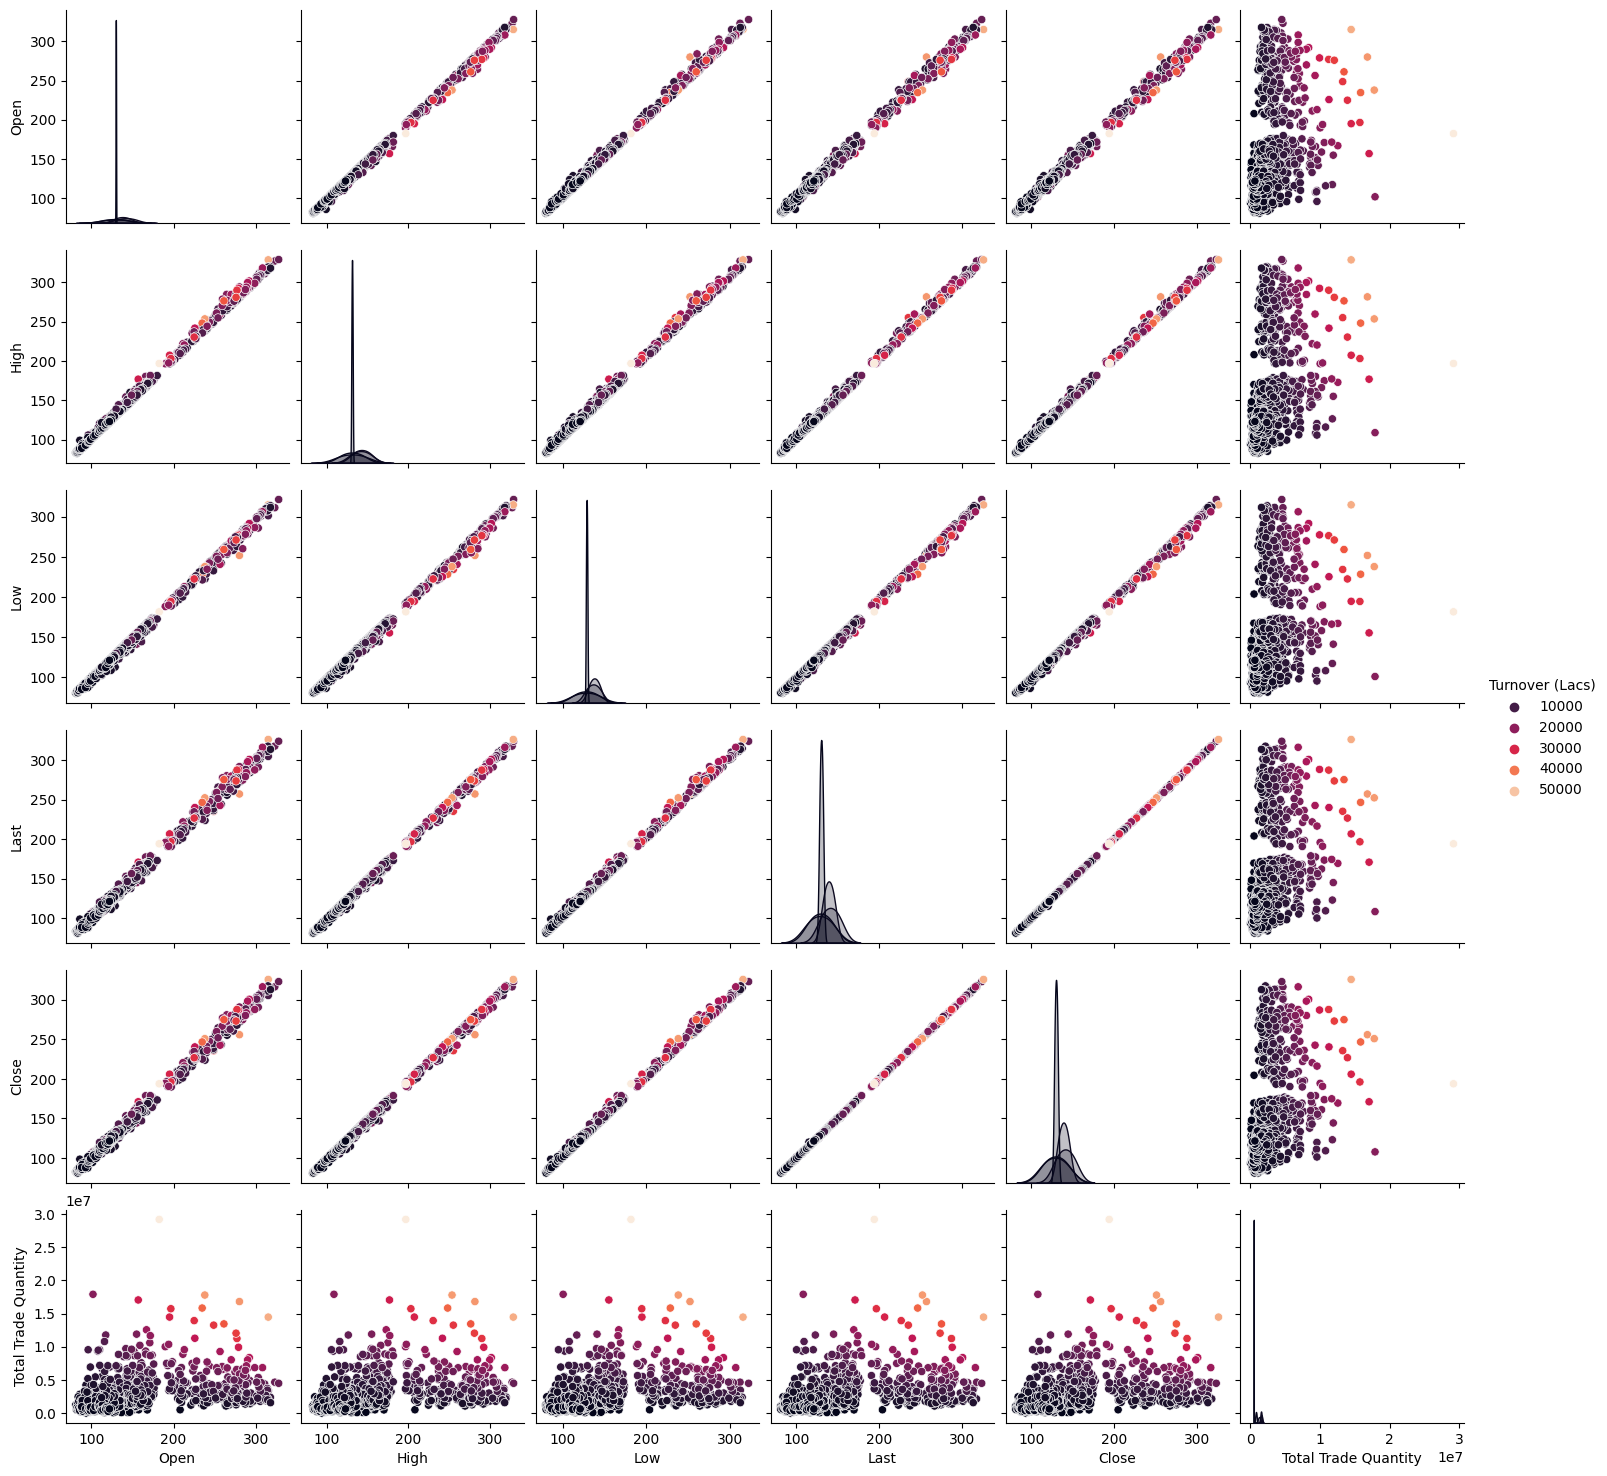

In [ ]:
import seaborn as sns
sns.pairplot(dataset, hue= 'Turnover (Lacs)', palette= "rocket")
plt.show()

In [ ]:
df_close=dataset.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

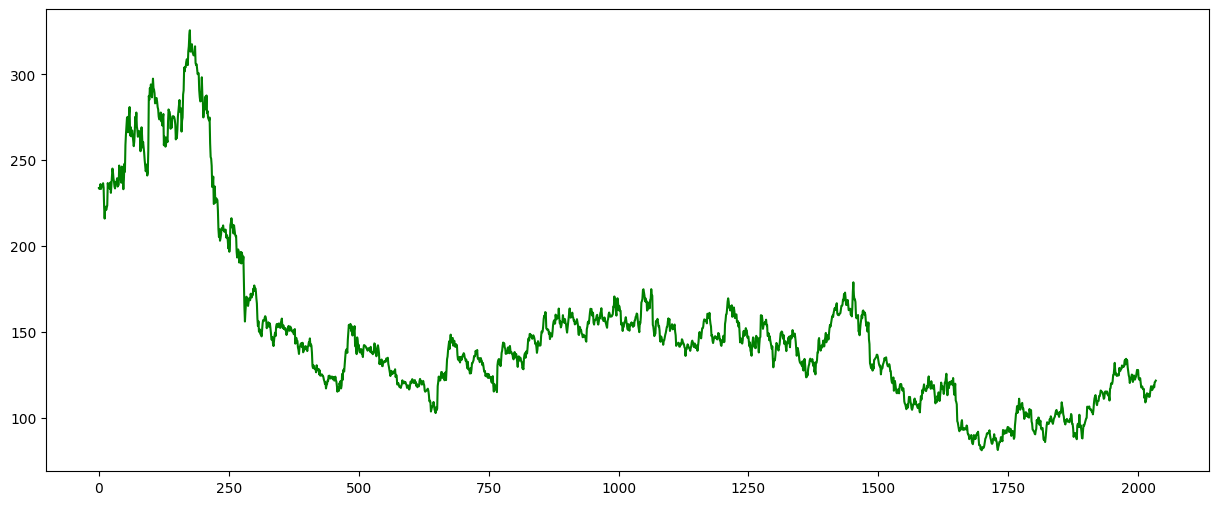

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_close, c= "g")
plt.show()

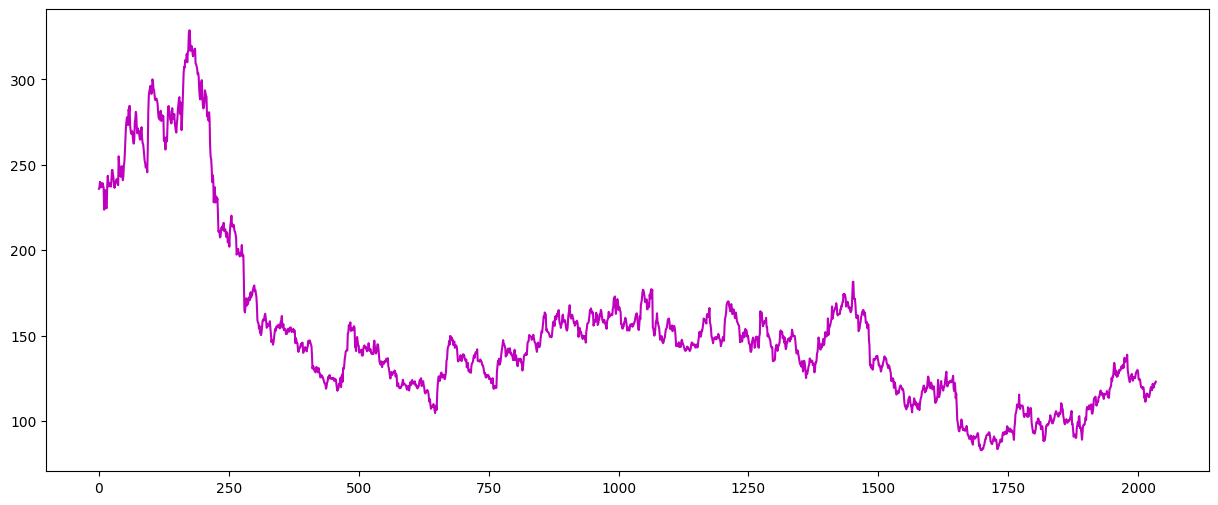

In [ ]:
plt.figure(figsize=(15,6))
df_high=dataset.reset_index()['High']
plt.plot(df_high, c="m")
plt.show()

In [ ]:
dataset["Date"]=pd.to_datetime(dataset["Date"])
data=dataset.sort_values(by="Date")
data.reset_index(inplace=True)
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


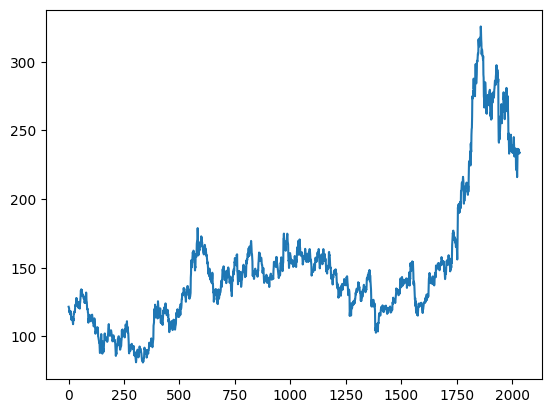

In [ ]:
data_new=data.reset_index()["Close"]
plt.plot(data_new)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_new=scaler.fit_transform(np.array(data_new).reshape(-1,1))
print(data_new)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [ ]:
training_size=int(len(data_new)*0.65)
test_size=len(data_new)-training_size
train_data,test_data=data_new[0:training_size,:],data_new[training_size:len(data_new),:1]
training_size,test_size

(1322, 713)

In [ ]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19546569],
       [0.18280229],
       [0.19178922]])

In [ ]:
test_data

array([[0.19219771],
       [0.19281046],
       [0.21058007],
       [0.19526144],
       [0.20404412],
       [0.21589052],
       [0.2124183 ],
       [0.21813725],
       [0.22058824],
       [0.22875817],
       [0.23120915],
       [0.22589869],
       [0.22569444],
       [0.22038399],
       [0.21527778],
       [0.22222222],
       [0.22079248],
       [0.20915033],
       [0.22201797],
       [0.21343954],
       [0.21813725],
       [0.21609477],
       [0.22712418],
       [0.25020425],
       [0.24897876],
       [0.25306373],
       [0.24611928],
       [0.24938725],
       [0.26082516],
       [0.25776144],
       [0.24897876],
       [0.26715686],
       [0.26654412],
       [0.26736111],
       [0.2563317 ],
       [0.2753268 ],
       [0.2626634 ],
       [0.24142157],
       [0.25939542],
       [0.24897876],
       [0.23917484],
       [0.22324346],
       [0.21691176],
       [0.1942402 ],
       [0.16707516],
       [0.18566176],
       [0.16993464],
       [0.166

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
     

time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)
# Reshaping the data variables to fit the Stacked LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_train.shape[1],1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
modelLSTM=Sequential()
modelLSTM.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
modelLSTM.add(LSTM(50,return_sequences=True))
modelLSTM.add(LSTM(50))
modelLSTM.add(Dense(1))
modelLSTM.compile(loss='mean_squared_error',optimizer='adam')
modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelLSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 216ms/step - loss: 0.0114 - val_loss: 0.0188
Epoch 2/100
20/20 [==============================] - 3s 160ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 3/100
20/20 [==============================] - 3s 176ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 4/100
20/20 [==============================] - 4s 177ms/step - loss: 8.5833e-04 - val_loss: 0.0038
Epoch 5/100
20/20 [==============================] - 3s 161ms/step - loss: 7.8481e-04 - val_loss: 0.0029
Epoch 6/100
20/20 [==============================] - 3s 159ms/step - loss: 7.4899e-04 - val_loss: 0.0042
Epoch 7/100
20/20 [==============================] - 4s 199ms/step - loss: 7.3759e-04 - val_loss: 0.0038
Epoch 8/100
20/20 [==============================] - 3s 164ms/step - loss: 7.2318e-04 - val_loss: 0.0042
Epoch 9/100
20/20 [==============================] - 3s 161ms/step - loss: 6.8979e-04 - val_loss: 0.0035
Epoch 10/100
20/20 [==============================] - 5s 231ms/ste

In [ ]:
import tensorflow as tf
import math
train_predict=modelLSTM.predict(X_train)
test_predict=modelLSTM.predict(X_test)

20/20 [==============================] - 1s 45ms/step


In [ ]:
# Change The Current Form To The Original Dataset Form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

135.24717584901657

In [ ]:
# Calculate The Perfomance Metrics Using Root Mean Squared Error (Test Set)
math.sqrt(mean_squared_error(y_test,test_predict))

201.79952139261988

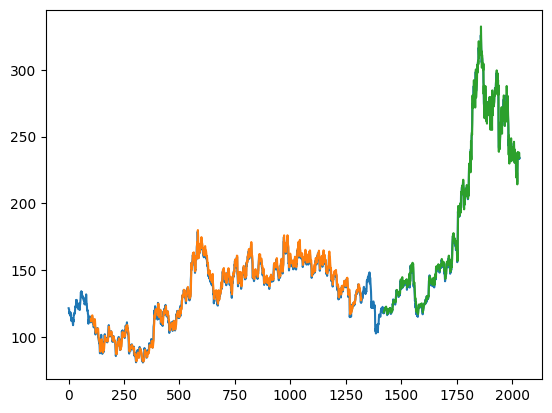


Blue line represents the whole dataset


Orange line shos the predictions on the train dataset


Green line shows the predictions on the test dataset



In [ ]:
# Plotting The Prediction Of The Train Data & Test Data Along With The Full Dataset
look_back=100
trainpredictplot=numpy.empty_like(data_new)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#------------------------------
testpredictplot=numpy.empty_like(data_new)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data_new)-1,:]=test_predict
#------------------------------
plt.plot(scaler.inverse_transform(data_new))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()
print("\nBlue line represents the whole dataset\n")
print("\nOrange line shos the predictions on the train dataset\n")
print("\nGreen line shows the predictions on the test dataset\n")

In [ ]:
len(test_data)

713

In [ ]:

# Reshaping The New Values For Forecasting 
x_input=test_data[613:].reshape(1,-1)
x_input.shape
     

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# Forecasting The Stock Market Price For The Next 30 Days
from numpy import array
output_list=[]
step=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,step,1))
    yhat=modelLSTM.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    output_list.extend(yhat.tolist())
    i+=1
  else:
    x_input=x_input.reshape((1,step,1))
    yhat=modelLSTM.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    output_list.extend(yhat.tolist())
    i+=1
print(output_list)

0 day input [0.76021242 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791
 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333
 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523
 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951
 0.66319444 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098
 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013
 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882
 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634
 0.62254902 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908
 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987
 0.625      0.63582516 0.62949346 0.62888072 0.62765523 0.62234477
 0.63378268 0.62622549 0.62214052 0.62418301 0.627312   0.6305787
 0.63290238 0.63429379 0.63505524 0.63554519 0.63599873 0.63649803
 0.6370225  0.63751549 0.63793093 0.63825142 0.63848478 0.63865203
 0.63877565 0.63887459 0.63896132 0.63904423 0.639129

In [ ]:
new_day=np.arange(1,101)
new_day_pred=np.arange(101,131)
     

In [ ]:
len(data_new)

2035

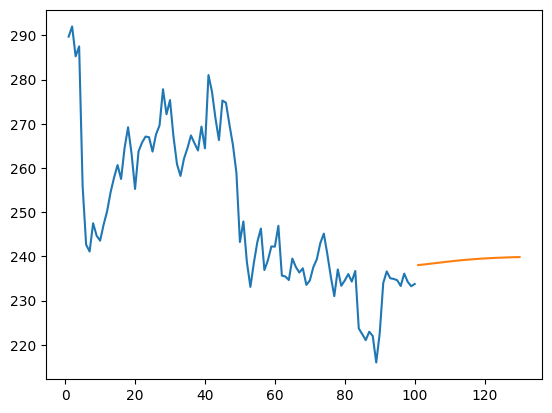

In [ ]:
plt.plot(new_day,scaler.inverse_transform(data_new[1935:]))
plt.plot(new_day_pred,scaler.inverse_transform(output_list))

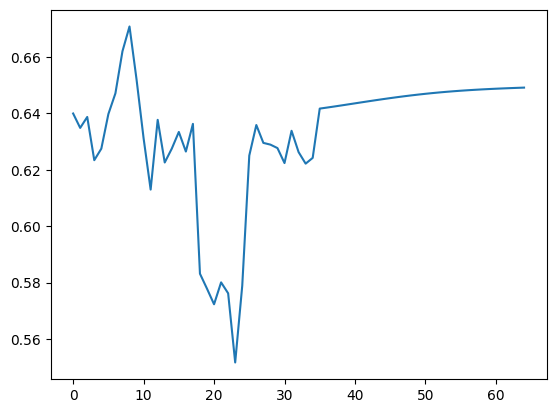

In [ ]:
data_forecast=data_new.tolist()
data_forecast.extend(output_list)
plt.plot(data_forecast[2000:])

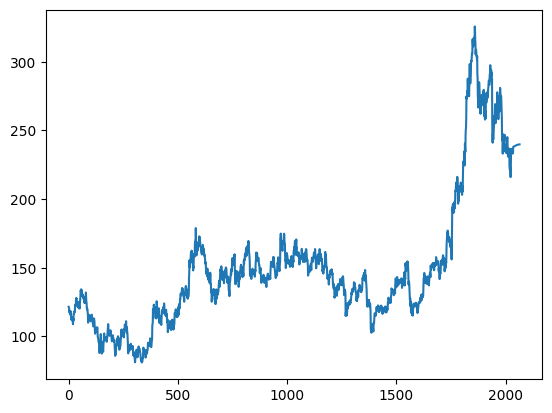

In [ ]:
data_forecast=scaler.inverse_transform(data_forecast).tolist()
plt.plot(data_forecast)